In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords for text preprocessing
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load IMDB dataset
data = pd.read_csv(r"C:\Users\yashk\Projects\Competitions\Fellowship AI\IMDB Dataset.csv")
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Check for missing or invalid data
print(data['review'].head())
print(data['review'].isnull().sum())

# Fill missing values with an empty string
data['review'] = data['review'].fillna('')


0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object
0


In [4]:
def clean_text(text):
    # Ensure input is a string
    if not isinstance(text, str):
        return ''
    
    # Remove HTML tags, special characters, and convert to lowercase
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()

    # Remove stopwords
    text = [word for word in text if word not in stopwords_set]
    return ' '.join(text)
    


In [5]:
# Clean the data
stopwords_set = set(stopwords.words('english'))

data['review'] = data['review'].fillna('')
data['review'] = data['review'].apply(clean_text)

print(data.head())


                                              review sentiment
0  one reviewers mentioned watching oz episode ho...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically family little boy jake thinks zombie...  negative
4  petter mattei love time money visually stunnin...  positive


In [6]:
# Split data into features (X) and labels (y)
X = data['review']
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convert to binary labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% testing 80% training

In [7]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=15000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [8]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)


In [9]:
print(y_pred)

[0 1 0 ... 1 0 1]


In [10]:
# Evaluate the model and refer the report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))


Accuracy: 89.59%
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



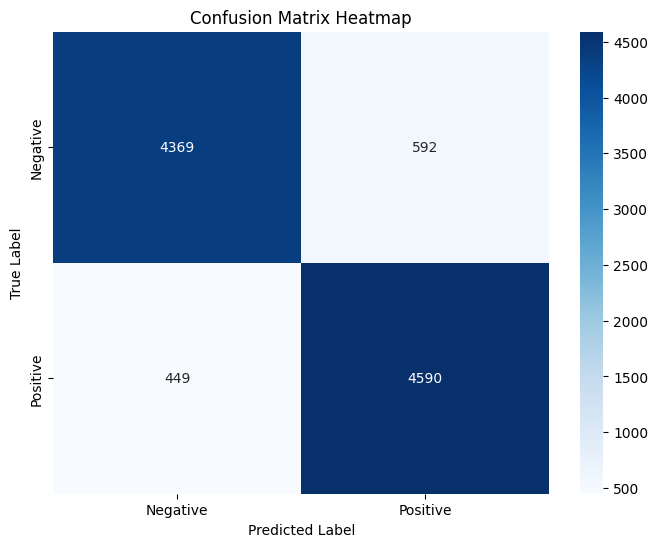

In [ ]:
# confusion matrix and a heat map
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [12]:
# Testing on new entries
new_reviews = ['''"ADIPURUSH" is an unfortunate attempt at adapting an epic story, resulting in a cinematic disaster that falls flat on multiple levels. From the onset, it becomes painfully evident that the film has made some regrettable choices in terms of visual effects (VFX), dialogues, and the overall adaptation.
''',
'''It's still messy, but it gets more right than its predecessors. This is easily the campiest and most mature of the bunch. It takes its time with the characters, letting us sit with them instead of rushing into the next action set piece. Still being PG-13 it manages to cram in a lot more gore than its predecessors.''']

new_reviews_cleaned = [clean_text(review) for review in new_reviews]


new_reviews_tfidf = tfidf.transform(new_reviews_cleaned)

predictions = model.predict(new_reviews_tfidf)

print(predictions)


[0 1]
